### Verizon Assessment 
* Classification Model building which will identify if the statement is clickbait or not

In [1]:
import numpy as np 
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [2]:
# Reading the received excel sheet
df = pd.read_excel(r'Dataset_for_NLP.xlsx',sheet_name='Sheet2')

In [3]:
df.head() # to chcek first five datapoint 

,title,label
0,"15 Highly Important Questions About Adulthood,...",clickbait
1,250 Nuns Just Cycled All The Way From Kathmand...,clickbait
2,"Australian comedians ""could have been shot"" du...",not-clickbait
3,Lycos launches screensaver to increase spammer...,not-clickbait
4,Fußball-Bundesliga 2008–09: Goalkeeper Butt si...,not-clickbait


In [4]:
df.shape #to chheck the shape of the dataframe

(10000, 2)

In [5]:
df.describe()  # to check duplicate and unique datapoint

,title,label
count,10000,10000
unique,10000,2
top,"15 Highly Important Questions About Adulthood,...",not-clickbait
freq,1,5002


In [6]:
df['label'].value_counts()

not-clickbait    5002
clickbait        4998
Name: label, dtype: int64

In [7]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

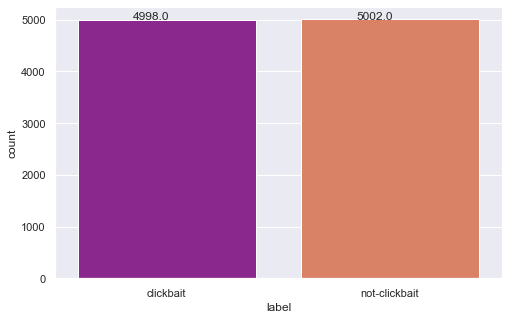

In [8]:
# Visualizing the count of 'clickbait' and 'not-clickbait' in the dataset
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='label', data=df, palette="plasma")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

* Here we can see that datset is balanced and hence we are moving towrad data processing

#### Data Processing

In [9]:
from sklearn.preprocessing import LabelEncoder
pd.options.mode.chained_assignment = None

In [10]:
df['label'] = LabelEncoder().fit_transform(df['label'])
df.head()   #datapoints post doing labelencoder

,title,label
0,"15 Highly Important Questions About Adulthood,...",0
1,250 Nuns Just Cycled All The Way From Kathmand...,0
2,"Australian comedians ""could have been shot"" du...",1
3,Lycos launches screensaver to increase spammer...,1
4,Fußball-Bundesliga 2008–09: Goalkeeper Butt si...,1


In [11]:
# Cleaning the dataset
wnl = WordNetLemmatizer()
for i in range(0,df.shape[0]):
  # Cleaning special character from the message
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.title[i])
  # Converting the entire message into lower case
  message = message.lower()
  # Tokenizing the review by words
  words = message.split()
  # Removing the stop words
  words = [word for word in words if word not in set(stopwords.words('english'))]
  # Stemming the words
  words = [wnl.lemmatize(word) for word in words]
  # Joining the stemmed words
  df.title[i] = ' '.join(words)

In [12]:
df.head()

,title,label
0,highly important question adulthood answered m...,0
1,nun cycled way kathmandu new delhi,0
2,australian comedian could shot apec prank,1
3,lycos launch screensaver increase spammer bill,1
4,fu ball bundesliga goalkeeper butt sign bayern...,1


#### Model Building
* Used TFIDF technique to vectorize the statement
* Naive bayes work good with binary classfication in NLP data, hence used it for model building

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
x = df['title']
y = df['label']
# Splitting train and test datapoint
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=2)

In [14]:
# Checking the sahpe of train and test datapoint
print(f"Shape of Train Feature: {train_x.shape}")
print(f"Shape of Test Feature: {test_x.shape}")
print(f"Shape of Train Label: {train_y.shape}")
print(f"Shape of Test Label: {test_y.shape}")

Shape of Train Feature: (7500,)
Shape of Test Feature: (2500,)
Shape of Train Label: (7500,)
Shape of Test Label: (2500,)


In [15]:
# Implementing TF-IDF for model building
tfidf=TfidfVectorizer()
train_1=tfidf.fit_transform(train_x)
test_1=tfidf.transform(test_x)

In [16]:
print("Number of features extracted")
print(len(tfidf.get_feature_names()))
print("The 100 features extracted from TF-IDF ")
print(tfidf.get_feature_names()[:100])

Number of features extracted
9751
The 100 features extracted from TF-IDF 
['aa', 'aaa', 'aaevpc', 'aaron', 'ab', 'abandon', 'abandoned', 'abandoning', 'abbas', 'abbey', 'abc', 'abducted', 'abduction', 'abductor', 'abdul', 'abdullah', 'abdulmutallab', 'abel', 'abercrombie', 'ability', 'abitibibowater', 'abkhazia', 'ablaze', 'able', 'aboard', 'abolished', 'aborigine', 'aborted', 'abortion', 'abound', 'abrams', 'abroad', 'abrogates', 'absence', 'absentee', 'absolute', 'absolutely', 'abstention', 'abu', 'abuela', 'abuelita', 'abuse', 'abusing', 'academic', 'academy', 'acapella', 'accelerates', 'accent', 'acceptance', 'accepted', 'accepts', 'access', 'accessory', 'accident', 'accidental', 'accidentally', 'accord', 'according', 'account', 'accountant', 'accra', 'accurate', 'accusation', 'accuse', 'accused', 'accuses', 'ache', 'achievement', 'acid', 'acknowledge', 'acknowledges', 'aclu', 'acorn', 'acquired', 'acquires', 'acquisition', 'acquit', 'acquitted', 'across', 'act', 'acted', 'acting',

In [17]:
# Checking the shape of train and test set after converting into vector
print("Shape of train set",train_1.shape)
print("Shape of test set",test_1.shape)

Shape of train set (7500, 9751)
Shape of test set (2500, 9751)


In [18]:
train_arr=train_1.toarray()
test_arr=test_1.toarray()

In [19]:
from sklearn.naive_bayes import MultinomialNB
# Multinomial Naive-Bayes object, as naive bayes work good with binary classfication in NLP data
NB_MN=MultinomialNB()
# Model Train
NB_MN.fit(train_arr,train_y)
# Prediction
pred=NB_MN.predict(test_arr)
print('first 10 actual labels: ',test_y.tolist()[:10])
print('first 10 predicted labels: ',pred.tolist()[:10])

first 10 actual labels:  [0, 1, 0, 1, 0, 1, 0, 1, 1, 1]
first 10 predicted labels:  [0, 1, 0, 1, 0, 1, 0, 1, 1, 1]


#### Model Evaluation

In [20]:
# Importing libraries for model evaluation on metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [21]:
print("Confusion Matrix")
print(confusion_matrix(test_y,pred))

Confusion Matrix
[[1187   48]
 [  98 1167]]


Text(21.5, 0.5, 'Actual values')

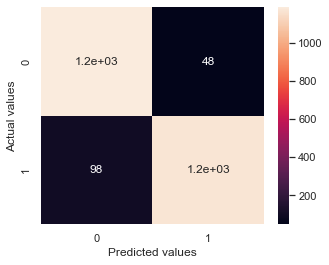

In [22]:
# Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(test_y,pred), annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [23]:
print("F1 score of the model")
print(f1_score(test_y,pred))
print("Accuracy of the model")
print(accuracy_score(test_y,pred))
print("Accuracy of the model in percentage")
print(accuracy_score(test_y,pred)*100,"%")

F1 score of the model
0.9411290322580644
Accuracy of the model
0.9416
Accuracy of the model in percentage
94.16 %


#### Conclusion
* Overall the models showed great results with decent accuracy and low error rate.
* As requested I have performed the EDA and model building for the assigned task but this model can be Hyper-tuned for more better clarity and result ,if we will try with different algorithm ,we might get different output and we can try ensemble technique too
* Thanks for provinding this opportunity!